# Analysis - exp25-28

- Transfer to Nim and Euclid

In [1]:
import os
import csv
import numpy as np
#import torch as th

from glob import glob
from pprint import pprint

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from notebook_helpers import load_monitored
from notebook_helpers import join_monitored
from notebook_helpers import score_summary

def load_stumbler_data(path, index_range=(0, 20)):
    exps = []
    runs = range(index_range[0], index_range[1])
    for r in runs:
        files = sorted(glob(os.path.join(path, 
            "run_{}_episode*_stumbler*".format(int(r)))))

        mon = join_monitored(files, sort_key='episode')
        exps.append(mon)
    return exps

# Find the files

In [2]:
path = "/Users/Jack/Desktop/PNC/CoAx/azad-next-move/data/wythoff/exp25/"
exp_25 = load_stumbler_data(path, (1, 21))

path = "/Users/Jack/Desktop/PNC/CoAx/azad-next-move/data/wythoff/exp26/"
exp_26 = load_stumbler_data(path, (1, 201)) ##############################################

path = "/Users/Jack/Desktop/PNC/CoAx/azad-next-move/data/wythoff/exp27/"
exp_27 = load_stumbler_data(path, (1, 21))

path = "/Users/Jack/Desktop/PNC/CoAx/azad-next-move/data/wythoff/exp28/"
exp_28 = load_stumbler_data(path, (1, 201)) ##############################################

In [3]:
path = "/Users/Jack/Desktop/PNC/CoAx/azad-next-move/data/wythoff/exp28_img-to-rep/"
exp_28_img_to_rep = load_stumbler_data(path, (1, 201)) ##############################################

path = "/Users/Jack/Desktop/PNC/CoAx/azad-next-move/data/wythoff/exp28_rep-to-rep/"
exp_28_rep_to_rep = load_stumbler_data(path, (1, 201)) ##############################################

In [4]:
pprint(exp_25[0].keys())
pprint(exp_26[0].keys())
pprint(exp_27[0].keys())
pprint(exp_28[0].keys())

dict_keys(['file', 'episode', 'loss', 'score', 'total_reward'])
dict_keys(['file', 'episode', 'loss', 'score', 'total_losses', 'total_reward', 'total_wins'])
dict_keys(['file', 'episode', 'loss', 'score', 'total_reward'])
dict_keys(['file', 'episode', 'loss', 'score', 'total_losses', 'total_reward', 'total_wins'])


In [21]:
episode_25, exp_25_avg, exp_25_SE = score_summary(exp_25, key="total_reward")
episode_26, exp_26_avg, exp_26_SE = score_summary(exp_26, key="total_reward")
episode_27, exp_27_avg, exp_27_SE = score_summary(exp_27, key="total_reward")
episode_28, exp_28_avg, exp_28_SE = score_summary(exp_28, key="total_reward")

In [22]:
episode_28_img_to_rep, exp_28_avg_img_to_rep, exp_28_SE_img_to_rep = score_summary(exp_28_img_to_rep, key="total_reward")
episode_28_rep_to_rep, exp_28_avg_rep_to_rep, exp_28_SE_rep_to_rep = score_summary(exp_28_rep_to_rep, key="total_reward")

# Plots

## Variations on V(s) projection

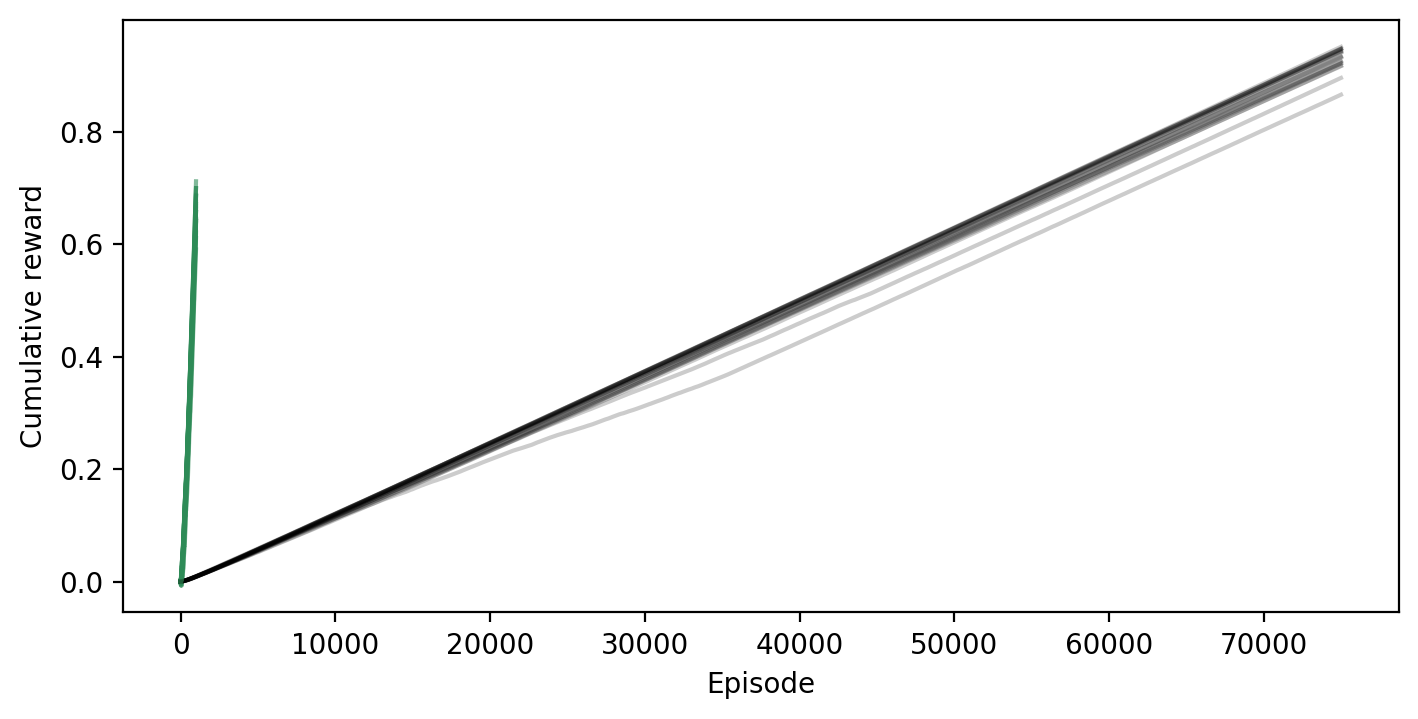

In [7]:
T = 5000
plt.figure(figsize=(7, 3.5))
for m1, m2 in zip(exp_25, exp_27):
    d1 = np.asarray(m1["total_reward"]) / np.max(m1["episode"])
    d2 = np.asarray(m2["total_reward"]) / np.max(m2["episode"])
    plt.plot(m1["episode"], d1, color="seagreen", alpha=0.6)
    plt.plot(m2["episode"], d2, color="black", alpha=0.2)

_ = plt.tight_layout()
# _ = plt.xlim(0, T)
# _ = plt.ylim(0, T)
_ = plt.xlabel("Episode")
_ = plt.ylabel("Cumulative reward")

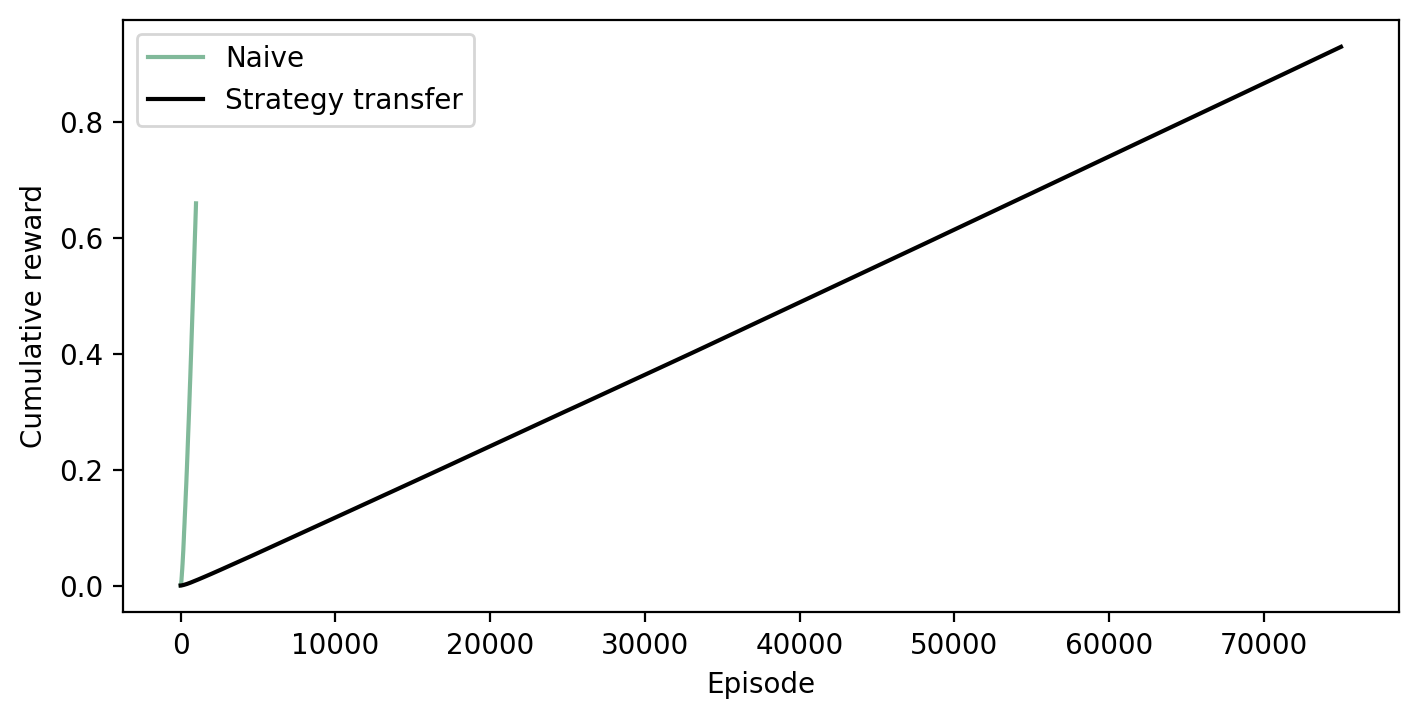

In [8]:
T = 5000
plt.figure(figsize=(7, 3.5))
plt.plot(episode_25, exp_25_avg/np.max(episode_25), color="seagreen", alpha=0.6, label="Naive")
plt.plot(episode_27, exp_27_avg/np.max(episode_27), color="black", alpha=1, label="Strategy transfer")
_ = plt.legend()
_ = plt.tight_layout()
# _ = plt.xlim(0, T)
# _ = plt.ylim(0, T)
_ = plt.xlabel("Episode")
_ = plt.ylabel("Cumulative reward")

In [9]:
# T = 5000
# plt.figure(figsize=(7, 3.5))
# plt.plot(episode_25, (exp_25_avg - exp_27_avg), color="pink", alpha=1, label="Naive advantage")

# _ = plt.legend()
# _ = plt.tight_layout()
# # _ = plt.xlim(0, T)
# # _ = plt.ylim(0, T)
# _ = plt.xlabel("Episode")
# _ = plt.ylabel("Cumulative reward difference (Nim)")

ValueError: operands could not be broadcast together with shapes (100,) (7500,) 

<Figure size 700x350 with 0 Axes>

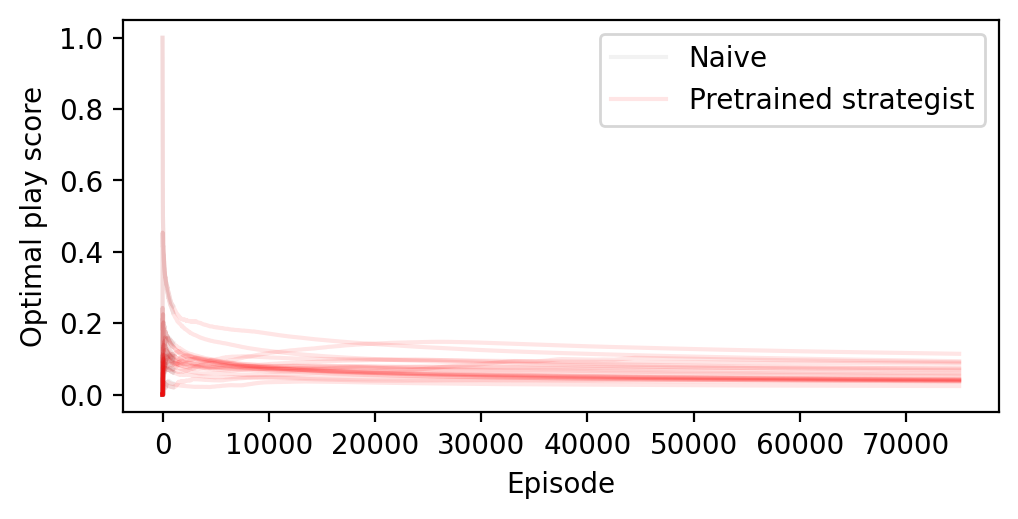

In [10]:
plt.figure(figsize=(5, 2.5))

for n, mon in enumerate(exp_25):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "Naive"
        
    # Plot
    _ = plt.plot(mon['episode'], mon['score'], 
                    color='grey', alpha=.1,  label=lab)

for n, mon in enumerate(exp_27):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "Pretrained strategist"
    
    # Plot
    _ = plt.plot(mon['episode'], mon['score'], 
                    color='red', alpha=.1, label=lab)

_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlabel("Episode")
_ = plt.ylabel("Optimal play score")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


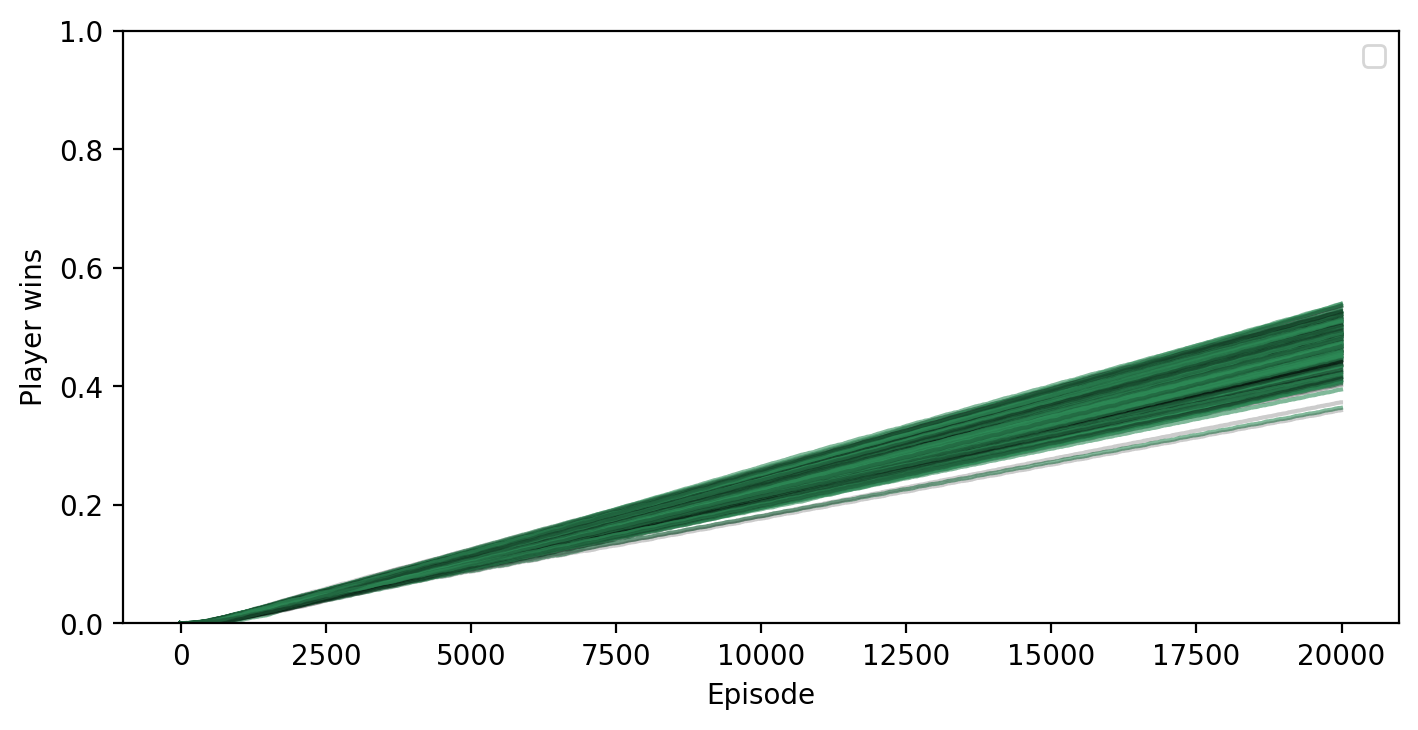

In [11]:
T = 75000
plt.figure(figsize=(7, 3.5))
for m1, m2 in zip(exp_26, exp_28):
    d1 = np.asarray(m1["total_reward"]) / np.max(m1["episode"])
    d2 = np.asarray(m2["total_reward"]) / np.max(m2["episode"])
    plt.plot(m1["episode"], d1, color="seagreen", alpha=0.6)
    plt.plot(m2["episode"], d2, color="black", alpha=0.2)

_ = plt.tight_layout()
_ = plt.legend()
# _ = plt.xlim(0, T)
_ = plt.ylim(0, 1)
_ = plt.xlabel("Episode")
_ = plt.ylabel("Player wins")

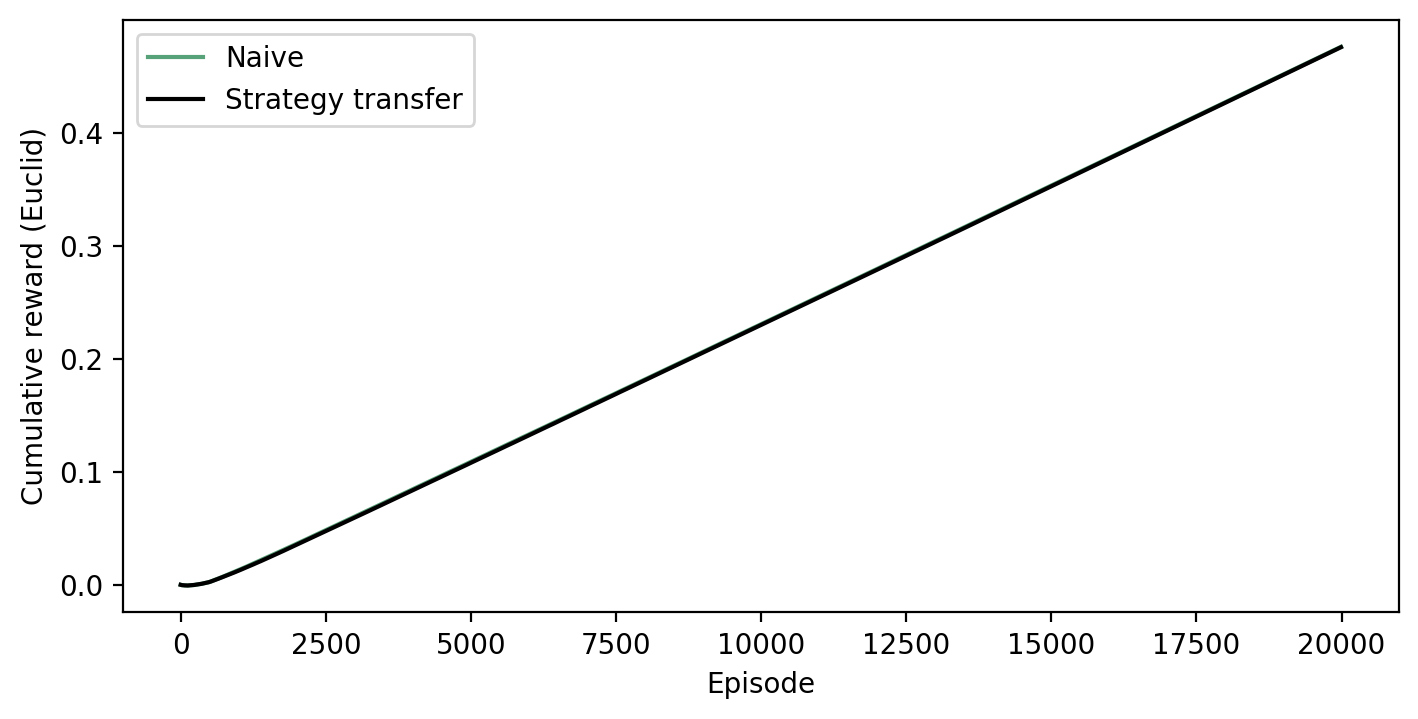

In [12]:
T = 75000
plt.figure(figsize=(7, 3.5))
plt.plot(episode_26, exp_26_avg/np.max(episode_26), color="seagreen", alpha=0.8, label="Naive")
plt.plot(episode_28, exp_28_avg/np.max(episode_28), color="black", alpha=1, label="Strategy transfer")
_ = plt.legend()
_ = plt.tight_layout()
# _ = plt.xlim(0, T)
# _ = plt.ylim(0, T)
_ = plt.xlabel("Episode")
_ = plt.ylabel("Cumulative reward (Euclid)")

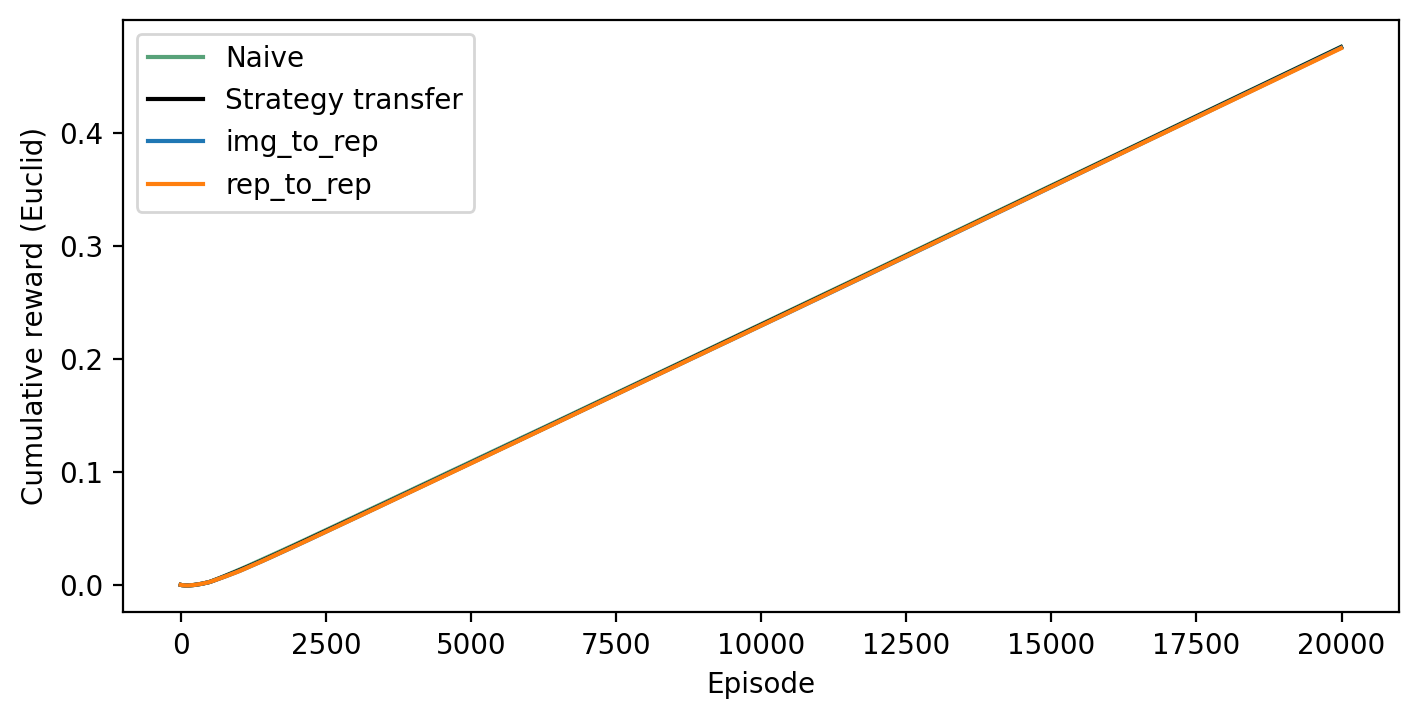

In [13]:
T = 75000
plt.figure(figsize=(7, 3.5))
plt.plot(episode_26, exp_26_avg/np.max(episode_26), color="seagreen", alpha=0.8, label="Naive")
plt.plot(episode_28, exp_28_avg/np.max(episode_28), color="black", alpha=1, label="Strategy transfer")
plt.plot(episode_28_img_to_rep, exp_28_avg_img_to_rep/np.max(episode_28_img_to_rep), alpha=1, label="img_to_rep")
plt.plot(episode_28_rep_to_rep, exp_28_avg_rep_to_rep/np.max(episode_28_rep_to_rep), alpha=1, label="rep_to_rep")
_ = plt.legend()
_ = plt.tight_layout()
# _ = plt.xlim(0, T)
# _ = plt.ylim(0, T)
_ = plt.xlabel("Episode")
_ = plt.ylabel("Cumulative reward (Euclid)")

In [16]:
print(f'Ending cumulative reward for  -  to img: {exp_26_avg[-1]}')
print(f'Ending cumulative reward for img to img: {exp_28_avg[-1]}')
print(f'Ending cumulative reward for img to rep: {exp_28_avg_img_to_rep[-1]}')
print(f'Ending cumulative reward for rep to rep: {exp_28_avg_rep_to_rep[-1]}')

Ending cumulative reward for  -  to img: 9513.26
Ending cumulative reward for img to img: 9506.13
Ending cumulative reward for img to rep: 9495.46
Ending cumulative reward for rep to rep: 9487.82


/var/folders/kg/g1dd54k55952tgw_kmcj8wqr0000gn/T/ipykernel_52959/1564618627.py:24: RuntimeWarning: divide by zero encountered in divide
  _ = ax1.plot(episode_26, exp_26_avg / episode_26,            color='thistle',       alpha=1, linewidth=3, label="naive-to-imagination")
/var/folders/kg/g1dd54k55952tgw_kmcj8wqr0000gn/T/ipykernel_52959/1564618627.py:25: RuntimeWarning: divide by zero encountered in divide
  _ = ax1.plot(episode_28, exp_28_avg / episode_28,            color='plum',          alpha=1, linewidth=3, label="imagination-to-imagination", linestyle="dashed")
/var/folders/kg/g1dd54k55952tgw_kmcj8wqr0000gn/T/ipykernel_52959/1564618627.py:26: RuntimeWarning: divide by zero encountered in divide
  _ = ax1.plot(episode_28, exp_28_avg_img_to_rep / episode_28, color='palevioletred', alpha=1, linewidth=3, label="imagination-to-replay",      linestyle="dashdot")
/var/folders/kg/g1dd54k55952tgw_kmcj8wqr0000gn/T/ipykernel_52959/1564618627.py:27: RuntimeWarning: divide by zero encountered

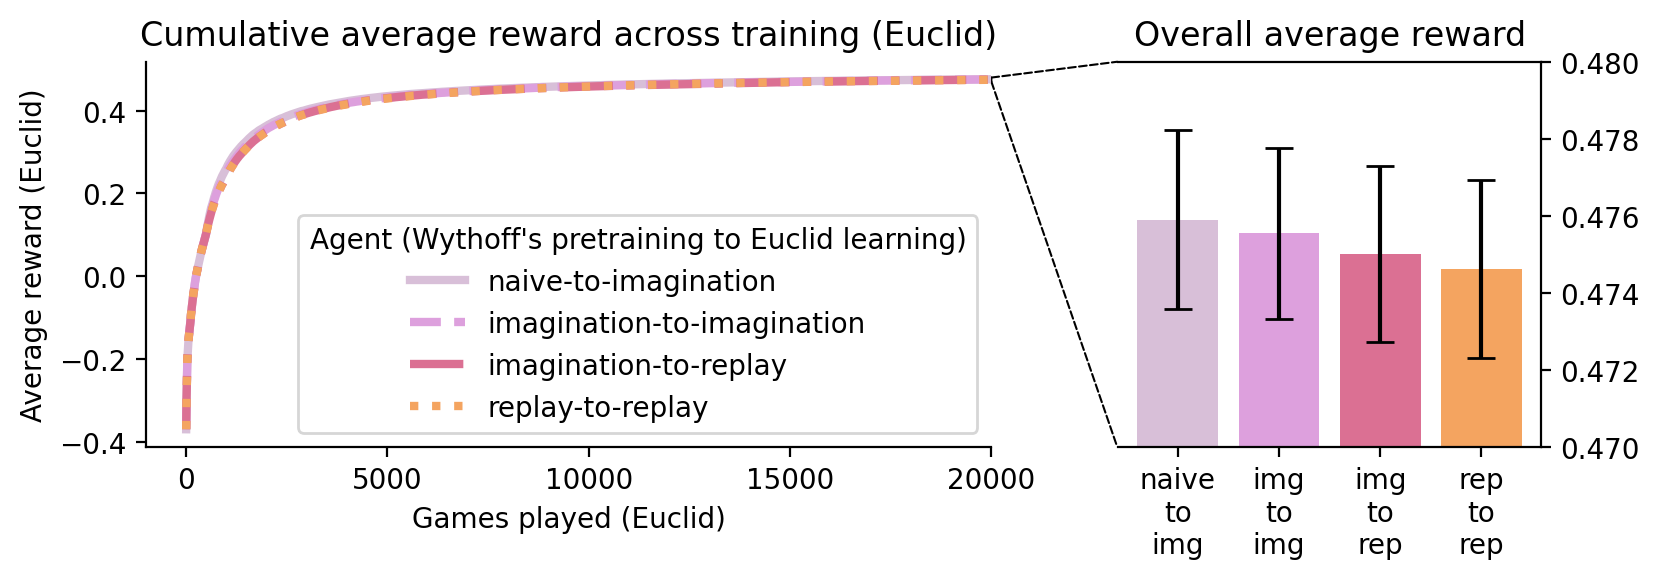

In [81]:
from matplotlib.patches import ConnectionPatch

# Create a figure and a gridspec
fig = plt.figure(figsize=(9, 2.5))
gs = fig.add_gridspec(1, 2, width_ratios=[2, 1]) #, height_ratios=[1, 1]
fig.tight_layout()

# Create subplots using the gridspec
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
# ax3 = fig.add_subplot(gs[1, 0])
# ax4 = fig.add_subplot(gs[1, 1])
for ax in [ax1]: #, ax3
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
for ax in [ax2]: #, ax4
    ax.spines['left'].set_visible(False)
    ax.yaxis.tick_right()

# # Summarize data from games won
# episode_14,        exp_14_avg,        exp_14_SE        = score_summary(exp_14,        key="total_wins")
# episode_14_replay, exp_14_replay_avg, exp_14_replay_SE = score_summary(exp_14_replay, key="total_wins")
# episode_13,        exp_13_avg,        exp_13_SE        = score_summary(exp_13,        key="total_wins")
_ = ax1.plot(episode_26, exp_26_avg / episode_26,            color='thistle',       alpha=1, linewidth=3, label="naive-to-imagination")
_ = ax1.plot(episode_28, exp_28_avg / episode_28,            color='plum',          alpha=1, linewidth=3, label="imagination-to-imagination", linestyle="dashed")
_ = ax1.plot(episode_28, exp_28_avg_img_to_rep / episode_28, color='palevioletred', alpha=1, linewidth=3, label="imagination-to-replay",      linestyle="dashdot")
_ = ax1.plot(episode_28, exp_28_avg_rep_to_rep / episode_28, color='sandybrown',    alpha=1, linewidth=3, label="replay-to-replay",           linestyle="dotted")
_ = ax1.legend(title='Agent (Wythoff\'s pretraining to Euclid learning)')
_ = ax1.set_ylabel("Average reward (Euclid)")
# _ = ax1.set_ylim(0.24, 0.9)
_ = ax1.set_xlim(right=20000)
_ = ax1.set_xticks(np.arange(0, 20001, 5000))
_ = ax1.set_xlabel("Games played (Euclid)")
# _ = ax1.xaxis.set_ticklabels([])
_ = ax1.set_title('Cumulative average reward across training (Euclid)')

_ = ax2.bar(range(4), [exp_26_avg[-1]            / max(episode_26),
                       exp_28_avg[-1]            / max(episode_28),
                       exp_28_avg_img_to_rep[-1] / max(episode_28_img_to_rep),
                       exp_28_avg_rep_to_rep[-1] / max(episode_28_rep_to_rep)],
            yerr =    [exp_26_SE[-1]            / max(episode_26),
                       exp_28_SE[-1]            / max(episode_28),
                       exp_28_SE_img_to_rep[-1] / max(episode_28_img_to_rep),
                       exp_28_SE_rep_to_rep[-1] / max(episode_28_rep_to_rep)],
            color = ["thistle", "plum", "palevioletred", "sandybrown"],
            alpha = 1.0,
            capsize = 5)
_ = ax2.set_ylim(0.47, 0.48)
_ = ax2.xaxis.set_ticklabels(['', 'naive\nto\nimg', 'img\nto\nimg', 'img\nto\nrep', 'rep\nto\nrep'])
_ = ax2.set_title('Overall average reward')

# # Summarize data from optimal moves
# episode_14,        exp_14_avg,        exp_14_SE        = score_summary(exp_14,        key="total_op_moves")
# episode_14_replay, exp_14_replay_avg, exp_14_replay_SE = score_summary(exp_14_replay, key="total_op_moves")
# episode_13,        exp_13_avg,        exp_13_SE        = score_summary(exp_13,        key="total_op_moves")

# _ = ax3.plot(episode_14,        exp_14_avg        / episode_14,        color='purple', alpha=0.5, linewidth=3, label="imagination-strategist")
# _ = ax3.plot(episode_14_replay, exp_14_replay_avg / episode_14_replay, color='orange', alpha=0.7, linewidth=3, label="replay-strategist", linestyle="--")
# _ = ax3.plot(episode_13,        exp_13_avg        / episode_13,        color='grey',   alpha=0.5, linewidth=3, label="stumbler alone", linestyle="-")
# _ = ax3.set_xlabel("Games played")
# _ = ax3.set_ylabel("Optimal moves per game")
# _ = ax3.set_ylim(0.3, 1.95)
# _ = ax3.set_xlim(right=20000)
# _ = ax3.set_xticks(np.arange(0, 20001, 5000))

# _ = ax4.bar(range(3), [exp_14_avg[-1]        / episode_14[-1],
#                        exp_14_replay_avg[-1] / episode_14_replay[-1],
#                        exp_13_avg[-1]        / episode_13[-1]],
#             yerr =    [exp_14_SE[-1]        / episode_14[-1],
#                        exp_14_replay_SE[-1] / episode_14_replay[-1], 
#                        exp_13_SE[-1]        / episode_13[-1] ],
#             alpha = 1.0,
#             color = ["plum", "sandybrown", "darkgray"],
#             capsize = 5)
# _ = ax4.set_xlabel("Agent")
# _ = ax4.xaxis.set_ticklabels(['', 'imagination    ', 'replay', 'stumbler'])
# _ = ax4.tick_params(bottom=False)
# _ = ax4.set_ylim(1.45, 1.85)

#
con1 = ConnectionPatch(xyA=(20000, 0.48), coordsA=ax1.transData,
                       xyB=(20000, 0.47), coordsB=ax1.transData, linestyle="-")
con2 = ConnectionPatch(xyA=(20000, 0.48), coordsA=ax1.transData,
                       xyB=(-0.6, 0.48), coordsB=ax2.transData, linestyle='--')
con3 = ConnectionPatch(xyA=(20000, 0.47), coordsA=ax1.transData,
                       xyB=(-0.6, 0.47), coordsB=ax2.transData, linestyle="--")
# con4 = ConnectionPatch(xyA=(20000, 1.85), coordsA=ax3.transData,
#                        xyB=(20000, 1.45), coordsB=ax3.transData, linestyle="-")
# con5 = ConnectionPatch(xyA=(20000, 1.85), coordsA=ax3.transData,
#                        xyB=(-0.55, 1.85), coordsB=ax4.transData, linestyle='--')
# con6 = ConnectionPatch(xyA=(20000, 1.45), coordsA=ax3.transData,
#                        xyB=(-0.55, 1.45), coordsB=ax4.transData, linestyle="--")

for con in [con1, con2, con3]:
    ax1.add_artist(con)
    con.set_linewidth(0.75)
# for con in [con4, con5, con6]:
#     ax3.add_artist(con)
#     con.set_linewidth(0.75)

plt.savefig('transfer_summary.png', dpi=400)
plt.savefig('transfer_summary.svg')

plt.show()

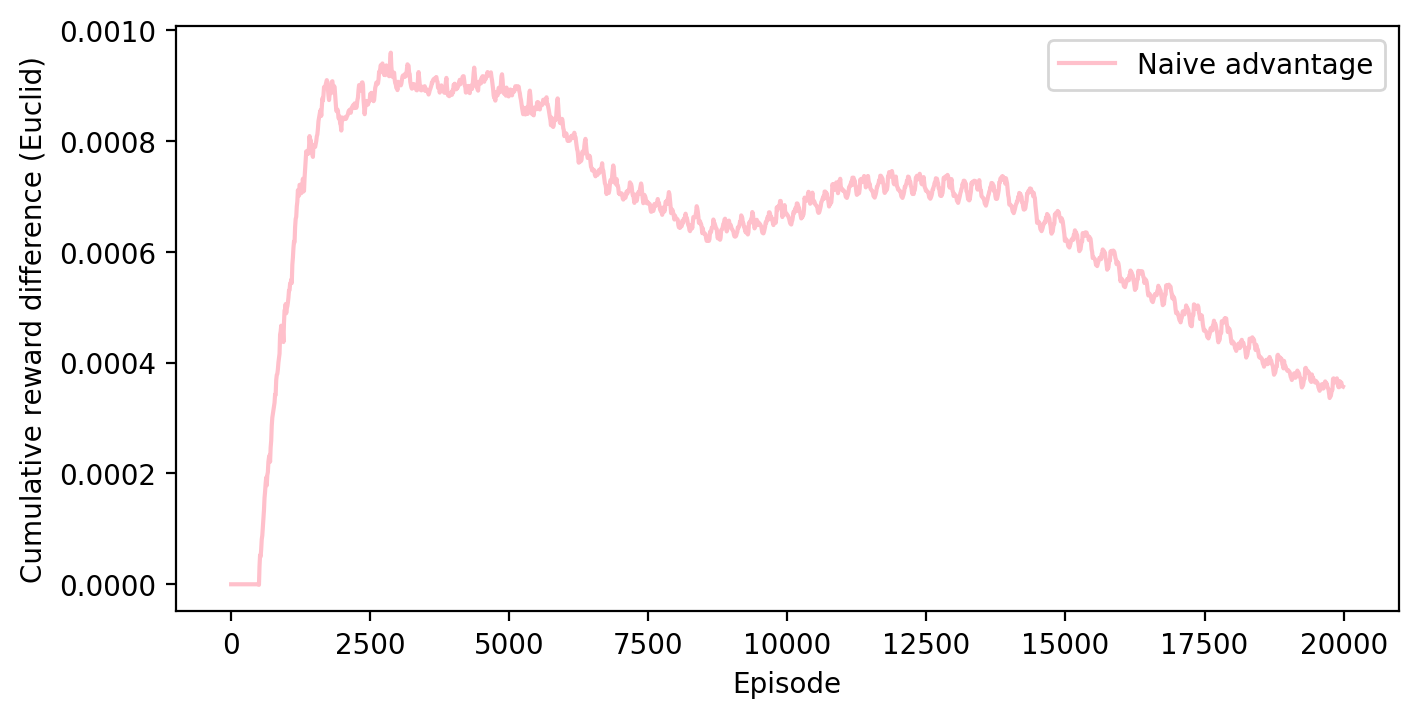

In [14]:
T = 5000
plt.figure(figsize=(7, 3.5))
plt.plot(episode_26, (exp_26_avg - exp_28_avg)/max(episode_26), color="pink", alpha=1, label="Naive advantage")

_ = plt.legend()
_ = plt.tight_layout()
# _ = plt.xlim(0, T)
# _ = plt.ylim(0, T)
_ = plt.xlabel("Episode")
_ = plt.ylabel("Cumulative reward difference (Euclid)")

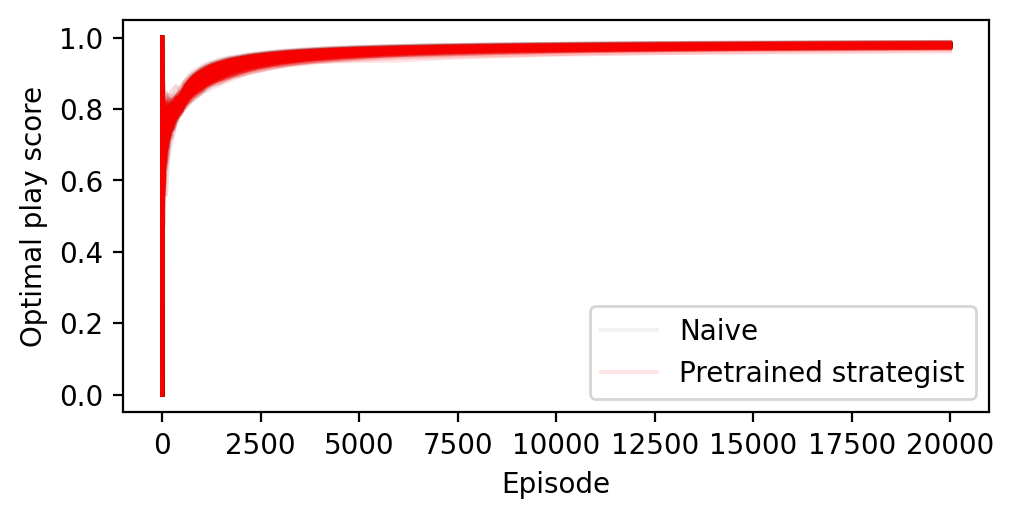

In [15]:
plt.figure(figsize=(5, 2.5))

for n, mon in enumerate(exp_26):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "Naive"
        
    # Plot
    _ = plt.plot(mon['episode'], mon['score'], 
                    color='grey', alpha=.1,  label=lab)

for n, mon in enumerate(exp_28):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "Pretrained strategist"
    
    # Plot
    _ = plt.plot(mon['episode'], mon['score'], 
                    color='red', alpha=.1, label=lab)

_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlabel("Episode")
_ = plt.ylabel("Optimal play score")

In [ ]:
episode_26, exp_26_avg, _ = score_summary(exp_26)
episode_28, exp_28_avg, _ = score_summary(exp_28)

In [ ]:
plt.figure(figsize=(7, 2.5))
_ = plt.plot(episode_26, exp_26_avg, linestyle="--", color='grey', alpha=.5, linewidth=3, label="Naive")
_ = plt.plot(episode_28, exp_28_avg, color='red', alpha=.5, linewidth=3, label="Pretrained strategist")
_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlabel("Episode")
_ = plt.ylabel("Optimal play score")

In [ ]:
plt.figure(figsize=(7, 2.5))
_ = plt.plot(episode_28, exp_26_avg - exp_28_avg, color='pink', alpha=1, label="Naive advantage")
_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlabel("Episode")
_ = plt.ylabel("Optimal play score difference")